In [30]:
# 파일의 데이터를 읽어서 데이터프레임 만들기

import numpy as np
import pandas as pd

paths = "../data-files/seoul-temperature.csv"

seoul_temp_df = pd.read_csv(paths)

# 데이터프레임 정보 확인

seoul_temp_df.info() # 데이터프레임의 정보를 요약해서 표시
print(seoul_temp_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42486 entries, 0 to 42485
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42486 non-null  object 
 1   지점       42486 non-null  int64  
 2   평균기온(℃)  41730 non-null  float64
 3   최저기온(℃)  41727 non-null  float64
 4   최고기온(℃)  41727 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB
(42486, 5)


In [31]:
# 앞 부분 일부 데이터 표시
seoul_temp_df.head(10) # 인자로 표시할 행 갯수 (기본 5)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
5,1907-10-06,108,13.0,11.2,21.3
6,1907-10-07,108,11.3,6.3,16.1
7,1907-10-08,108,8.9,3.9,14.9
8,1907-10-09,108,11.6,3.8,21.1
9,1907-10-10,108,14.2,6.4,24.1


In [32]:
# 뒷 부분 일부 데이터 표시
seoul_temp_df.tail() # 인자로 표시할 행 갯수 (기본 5)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
42481,2025-03-27,108,13.7,7.1,18.6
42482,2025-03-28,108,6.5,3.1,11.8
42483,2025-03-29,108,3.3,0.6,6.7
42484,2025-03-30,108,3.3,-1.8,7.6
42485,2025-03-31,108,7.7,1.2,14.1


In [33]:
sorted_df = seoul_temp_df.sort_values("최고기온(℃)", ascending=False) # 최고기온 컬럼을 기준으로 내림차순 정렬
print(sorted_df.head())
sorted_df = seoul_temp_df.sort_values("최저기온(℃)", ascending=True)
print(sorted_df.head())
sorted_df = seoul_temp_df.sort_values("평균기온(℃)", ascending=True)
print(sorted_df.head())

               날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
40051  2018-08-01  108     33.6     27.8     39.6
31277  1994-07-24  108     33.1     28.1     38.4
40050  2018-07-31  108     32.6     27.8     38.3
31276  1994-07-23  108     32.6     28.0     38.2
11636  1939-08-10  108     30.1     24.5     38.2
              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
7396  1927-12-31  108    -15.3    -23.1     -6.4
8503  1931-01-11  108    -17.4    -22.5    -14.7
4478  1920-01-04  108    -14.7    -22.3     -8.5
7401  1928-01-05  108    -15.1    -22.2    -10.6
8502  1931-01-10  108    -18.9    -21.9    -13.0
               날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
2661   1915-01-13  108    -19.2    -21.3    -16.3
8502   1931-01-10  108    -18.9    -21.9    -13.0
2662   1915-01-14  108    -18.0    -21.3    -13.8
8503   1931-01-11  108    -17.4    -22.5    -14.7
10335  1936-01-17  108    -16.4    -20.1    -12.0


In [34]:
# 최고기온을 찾고 최고기온 값과 같은 행 찾기

max_temp = seoul_temp_df["최고기온(℃)"].max() # 최고기온 컬럼 값 중 최대값 찾기 
max_temp_mask = seoul_temp_df["최고기온(℃)"] == max_temp
seoul_temp_df[max_temp_mask]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40051,2018-08-01,108,33.6,27.8,39.6


In [35]:
# 최저기온을 찾고 최저기온 값과 같은 행 찾기

min_temp = seoul_temp_df["최저기온(℃)"].min() # 최고기온 컬럼 값 중 최솟값 찾기 
min_temp_mask = seoul_temp_df["최저기온(℃)"] == min_temp
seoul_temp_df[min_temp_mask]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7396,1927-12-31,108,-15.3,-23.1,-6.4


In [36]:
# 5월 달 중에 가장 추웠던 날과 더웠던 날 찾기

seoul_temp_df.head()
seoul_temp_df["날짜"].dtypes, type(seoul_temp_df["날짜"][0])

may_mask = seoul_temp_df["날짜"].str.contains("-05-") # 날짜 컬럼의 각 행의 값 중 -05- 를 포함하면 True
may_temp_df = seoul_temp_df[may_mask]

sorted_may_df = may_temp_df.sort_values("최고기온(℃)", ascending=False)
sorted_may_df.head(5)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15582,1950-05-30,108,24.2,17.1,34.4
15581,1950-05-29,108,23.0,15.4,33.7
8995,1932-05-17,108,23.7,15.6,33.5
40347,2019-05-24,108,24.2,16.2,33.4
38528,2014-05-31,108,26.2,20.5,33.3


In [52]:
# 일교차 컬럼 추가

seoul_temp_df['일교차'] = seoul_temp_df["최고기온(℃)"] - seoul_temp_df["최저기온(℃)"]

seoul_temp_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
0,1907-10-01,108,13.5,7.9,20.7,12.8
1,1907-10-02,108,16.2,7.9,22.0,14.1
2,1907-10-03,108,16.2,13.1,21.3,8.2
3,1907-10-04,108,16.5,11.2,22.0,10.8
4,1907-10-05,108,17.6,10.9,25.4,14.5


In [56]:
# 결측값이 포함된 모든 행 제거

not_na_mask = seoul_temp_df.notna() # 결측값이면 False 아니면 True

na_removed_df = seoul_temp_df[not_na_mask]
sorted_temp_df = na_removed_df.sort_values("일교차")
sorted_temp_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
21968,1969-01-27,108,-0.1,-0.4,0.6,1.0
29556,1989-11-06,108,12.3,11.8,12.8,1.0
32724,1998-07-10,108,24.0,23.6,24.6,1.0
42240,2024-07-29,108,27.4,26.8,27.8,1.0
23225,1972-07-07,108,24.6,24.1,25.2,1.1
...,...,...,...,...,...,...
16431,1953-11-30,108,NaN,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN,NaN
39758,2017-10-12,108,11.4,8.8,NaN,NaN


C:\Users\human\AppData\Local\Temp\ipykernel_7952\2052269532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도'] = df['날짜'].dt.year
C:\Users\human\AppData\Local\Temp\ipykernel_7952\2052269532.py:25: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human\AppData\Local\Temp\ipykernel_7952\2052269532.py:25: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human\AppData\Local\Temp\ipykernel_7952\2052269532.py:25: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human\AppData\Local\Temp\ipykernel_7952\2052269532.py:25: UserWarning: Glyph 44512 (

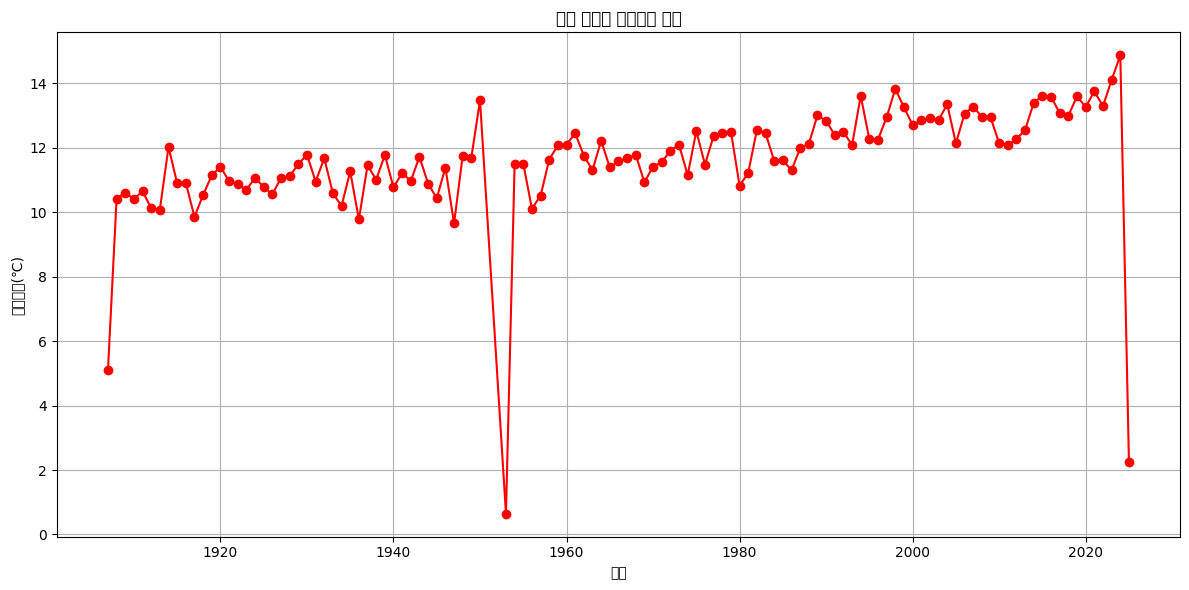

In [37]:
import matplotlib.pyplot as plt

df = seoul_temp_df

df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')

# 결측값 제거
df = df.dropna(subset=['날짜', '평균기온(℃)'])

# 연도 컬럼 추가
df['연도'] = df['날짜'].dt.year

# 연도별 평균기온 계산
yearly_avg = df.groupby('연도')['평균기온(℃)'].mean().reset_index()


# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['연도'], yearly_avg['평균기온(℃)'], marker='o', linestyle='-', color='red')

plt.title("서울 연도별 평균기온 변화")
plt.xlabel("연도")
plt.ylabel("평균기온(℃)")
plt.grid(True)
plt.tight_layout()

plt.show()